Import Libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.models import load_model

Read the train data just to get parameters for scalar tronsfrom of test data

In [37]:
read_train_dataset = pd.read_csv("/content/drive/My Drive/ML/train_data_RNN.csv",header=None)
train_dataset=read_train_dataset.iloc[:, 1:14].values

sc = MinMaxScaler()
train_dataset_scaled= sc.fit_transform(train_dataset)

Read test data without the index values

In [38]:
read_test_dataset = pd.read_csv("/content/drive/My Drive/ML/test_data_RNN.csv",header=None)
index=read_test_dataset.iloc[:, 0].values
test_dataset=read_test_dataset.iloc[:, 1:14].values

Scale test data

In [39]:
test_dataset_scaled = sc.transform(test_dataset)

Get features as x data and target as y train data

In [40]:
x=np.empty((377,12),dtype=float)
y_test=np.empty((377),dtype=float)

for i in range(test_dataset_scaled.shape[0]):
    x[i]=test_dataset_scaled[i,0:12]
    y_test[i]=test_dataset_scaled[i,12:]

#reshape x_train to (377,3,4)
x_test=x.reshape(377,3,4)

Load the saved LSTM model and predict the stock values based on the model

In [41]:
model =load_model('/content/drive/My Drive/ML/RNN_model.h5')

#predict the stock values
y_pred = model.predict(x_test,verbose=1)
y_pred = y_pred.flatten()

12/12 [==============================] - 2s 3ms/step


Invert the scalar transform used to get data in original readable form

In [42]:
features=3
y_pred_plot = (y_pred * sc.data_range_[features]) + sc.data_min_[features]
y_test_plot = (y_test * sc.data_range_[features]) + sc.data_min_[features]

Creating another array for y_pred and y_test data, to add index column and sort data for plotting

In [43]:
y_pred_sort=np.empty((377,2),dtype=float)
y_test_sort=np.empty((377,2),dtype=float)

for i in range(y_pred_sort.shape[0]):
    y_pred_sort[i][0]=index[i]
    y_pred_sort[i][1]=y_pred_plot[i]

for i in range(y_test_sort.shape[0]):
    y_test_sort[i][0]=index[i]
    y_test_sort[i][1]=y_test_plot[i]

columnIndex = 0
# Sort numpy array by index Column
sorted_ypred = y_pred_sort[y_pred_sort[:,columnIndex].argsort()]
sorted_ytest = y_test_sort[y_test_sort[:,columnIndex].argsort()]

Get the predicted stock price values from sorted array

In [44]:
y1=sorted_ypred.transpose()
y_pred_plot=y1[1]

Get the y_test actual stock price values from the sorted array

In [45]:
y1=sorted_ytest.transpose()
y_test_plot=y1[1]

Plot the stock price 

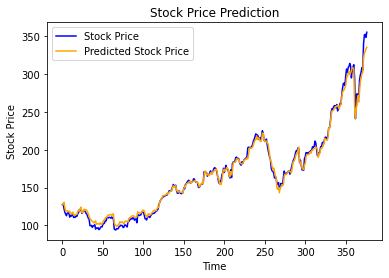


Loss= 5.367721163563926


In [46]:
plt.plot(y_test_plot, color = 'blue', label = 'Stock Price')
plt.plot(y_pred_plot, color = 'orange', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
print()

mse=mean_squared_error(y_pred_plot, y_test_plot,squared=False)
print("Loss=",mse)
